In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_fish = pd.read_csv("/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/fish.csv")

In [3]:
df_fish.head(2)

,#,Name,Sell,Where/How,Shadow,Total Catches to Unlock,Spawn Rates,Rain/Snow Catch Up,NH Jan,NH Feb,...,SH Dec,Color 1,Color 2,Size,Lighting Type,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
0,56,anchovy,200,Sea,Small,0,2–5,No,4 AM – 9 PM,4 AM – 9 PM,...,4 AM – 9 PM,Blue,Red,1x1,No lighting,Fish81,FishAntyobi,FtrFishAntyobi,4201,LzuWkSQP55uEpRCP5
1,36,angelfish,3000,River,Small,20,2–5,No,NaN,NaN,...,4 PM – 9 AM,Yellow,Black,1x1,Fluorescent,Fish30,FishAngelfish,FtrFishAngelfish,2247,XTCFCk2SiuY5YXLZ7


In [4]:
df_fish['Name'].unique()

array(['anchovy', 'angelfish', 'arapaima', 'arowana', 'barred knifejaw',
       'barreleye', 'betta', 'bitterling', 'black bass', 'blowfish',
       'blue marlin', 'bluegill', 'butterfly fish', 'carp', 'catfish',
       'char', 'cherry salmon', 'clown fish', 'coelacanth', 'crawfish',
       'crucian carp', 'dab', 'dace', 'dorado', 'football fish',
       'freshwater goby', 'frog', 'gar', 'giant snakehead',
       'giant trevally', 'golden trout', 'goldfish', 'great white shark',
       'guppy', 'hammerhead shark', 'horse mackerel', 'killifish',
       'king salmon', 'koi', 'loach', 'mahi-mahi', 'mitten crab',
       'moray eel', 'Napoleonfish', 'neon tetra', 'nibble fish',
       'oarfish', 'ocean sunfish', 'olive flounder', 'pale chub', 'pike',
       'piranha', 'pond smelt', 'pop-eyed goldfish', 'puffer fish',
       'rainbowfish', 'ranchu goldfish', 'ray', 'red snapper',
       'ribbon eel', 'saddled bichir', 'salmon', 'saw shark', 'sea bass',
       'sea butterfly', 'sea horse', 's

In [5]:
df_fish[df_fish['Name']=='ribbon eel']

,#,Name,Sell,Where/How,Shadow,Total Catches to Unlock,Spawn Rates,Rain/Snow Catch Up,NH Jan,NH Feb,...,SH Dec,Color 1,Color 2,Size,Lighting Type,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
59,65,ribbon eel,600,Sea,Long,0,2,No,NaN,NaN,...,All day,Blue,Black,2x1,Fluorescent,Fish71,FishHanahigeutubo,FtrFishHanahige,2272,T9zeSBHpB5qyAZTxu


In [6]:
df_fish[df_fish['Shadow']=='Long']

,#,Name,Sell,Where/How,Shadow,Total Catches to Unlock,Spawn Rates,Rain/Snow Catch Up,NH Jan,NH Feb,...,SH Dec,Color 1,Color 2,Size,Lighting Type,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
42,64,moray eel,2000,Sea,Long,20,2,No,NaN,NaN,...,NaN,Brown,Black,2x1,Fluorescent,Fish55,FishUtsubo,FtrFishUtsubo,2271,4nLynLTMRtoqcCfh4
59,65,ribbon eel,600,Sea,Long,0,2,No,NaN,NaN,...,All day,Blue,Black,2x1,Fluorescent,Fish71,FishHanahigeutubo,FtrFishHanahige,2272,T9zeSBHpB5qyAZTxu


In [7]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        80 non-null     int64 
 1   Name                     80 non-null     object
 2   Sell                     80 non-null     int64 
 3   Where/How                80 non-null     object
 4   Shadow                   80 non-null     object
 5   Total Catches to Unlock  80 non-null     int64 
 6   Spawn Rates              80 non-null     object
 7   Rain/Snow Catch Up       80 non-null     object
 8   NH Jan                   31 non-null     object
 9   NH Feb                   31 non-null     object
 10  NH Mar                   35 non-null     object
 11  NH Apr                   39 non-null     object
 12  NH May                   44 non-null     object
 13  NH Jun                   55 non-null     object
 14  NH Jul                   58 non-null     obj

In [8]:
df_fish.columns

Index(['#', 'Name', 'Sell', 'Where/How', 'Shadow', 'Total Catches to Unlock',
       'Spawn Rates', 'Rain/Snow Catch Up', 'NH Jan', 'NH Feb', 'NH Mar',
       'NH Apr', 'NH May', 'NH Jun', 'NH Jul', 'NH Aug', 'NH Sep', 'NH Oct',
       'NH Nov', 'NH Dec', 'SH Jan', 'SH Feb', 'SH Mar', 'SH Apr', 'SH May',
       'SH Jun', 'SH Jul', 'SH Aug', 'SH Sep', 'SH Oct', 'SH Nov', 'SH Dec',
       'Color 1', 'Color 2', 'Size', 'Lighting Type', 'Icon Filename',
       'Critterpedia Filename', 'Furniture Filename', 'Internal ID',
       'Unique Entry ID'],
      dtype='object')

In [9]:
fish = df_fish[['#', 'Name', 'Sell', 'Where/How', 'Shadow', 'Total Catches to Unlock',
       'Spawn Rates', 'Rain/Snow Catch Up'
       ,'Color 1', 'Color 2', 'Size', 'Lighting Type']]

fish.head(3)

,#,Name,Sell,Where/How,Shadow,Total Catches to Unlock,Spawn Rates,Rain/Snow Catch Up,Color 1,Color 2,Size,Lighting Type
0,56,anchovy,200,Sea,Small,0,2–5,No,Blue,Red,1x1,No lighting
1,36,angelfish,3000,River,Small,20,2–5,No,Yellow,Black,1x1,Fluorescent
2,44,arapaima,10000,River,XX-Large,50,1,Yes,Black,Blue,3x2,No lighting


In [10]:
fish.to_csv("fish.csv", index = False)

In [11]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        80 non-null     int64 
 1   Name                     80 non-null     object
 2   Sell                     80 non-null     int64 
 3   Where/How                80 non-null     object
 4   Shadow                   80 non-null     object
 5   Total Catches to Unlock  80 non-null     int64 
 6   Spawn Rates              80 non-null     object
 7   Rain/Snow Catch Up       80 non-null     object
 8   Color 1                  80 non-null     object
 9   Color 2                  80 non-null     object
 10  Size                     80 non-null     object
 11  Lighting Type            80 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.6+ KB


## 판매 가격 통계

In [12]:
fish['Sell'].describe()

count       80.000000
mean      3745.000000
std       4517.151561
min        100.000000
25%        500.000000
50%       1500.000000
75%       5000.000000
max      15000.000000
Name: Sell, dtype: float64

In [13]:
fig = px.histogram(fish, x='Sell', 
                   nbins=int(fish['Sell'].max() / 100), 
                   title='Histogram of Fish Sell Prices')

# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='Sell Price',
    yaxis_title='Count',
    bargap=0.1,  # 막대 사이의 간격 설정
    width=650,   # 그래프 너비 설정
    height=400   # 그래프 높이 설정
)

# 그래프 표시
fig.show()

In [14]:
Color1_count = fish['Color 1'].value_counts()

# 파이 차트 그리기
fig = px.pie(names=Color1_count.index, 
             values=Color1_count.values, 
             title='Pie Chart of Color 1')

# 그래프 레이아웃 설정
fig.update_layout(
    legend_title='Color 1',
    showlegend=True
)

# 그래프 표시
fig.show()

In [15]:
# 사이즈별 가격의 평균, 중위수, 최소값, 최대값 계산
Color1_price_stats = fish.groupby('Color 1')['Sell'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
Color1_price_stats.columns = ['Color 1', 'Count', 'Mean_Price', 'Median_Price', 'Min_Price', 'Max_Price']

# 결과 확인
print(Color1_price_stats)

       Color 1  Count   Mean_Price  Median_Price  Min_Price  Max_Price
0        Beige      4  1637.500000         650.0        250       5000
1        Black     15  6000.000000        4500.0        100      15000
2         Blue     11  3602.727273        1000.0        150      15000
3        Brown     17  4147.058824        2000.0        160      15000
4         Gray      3   833.333333         400.0        300       1800
5        Green      6  1578.333333        1350.0        120       3750
6   Light blue      4  3475.000000        1700.0        500      10000
7       Orange      4   737.500000         725.0        400       1100
8          Red      7  3214.285714        3000.0        200       9000
9        White      2  3000.000000        3000.0       1000       5000
10      Yellow      7  5085.714286        3000.0        300      15000


# 잡아야 하는 물고기 수

In [16]:
Catches_count = fish['Total Catches to Unlock'].value_counts()

# 파이 차트 그리기
fig = px.pie(names=Catches_count.index, 
             values=Catches_count.values, 
             title='Pie Chart of Total Catches to Unlock',
            color_discrete_sequence=px.colors.qualitative.Set3)

# 그래프 레이아웃 설정
fig.update_layout(
    legend_title='Total Catches to Unlock',
    showlegend=True
)

# 그래프 표시
fig.show()

# 발광 타입 분류

In [17]:
Lighting_count = fish['Lighting Type'].value_counts()

# 파이 차트 그리기
fig = px.pie(names=Lighting_count.index, 
             values=Lighting_count.values, 
             title='Pie Chart of Lighting Type',
            color_discrete_sequence=px.colors.qualitative.Set2)

# 그래프 레이아웃 설정
fig.update_layout(
    legend_title='Lighting Type',
    showlegend=True
)

# 그래프 표시
fig.show()

# 서식지별 분류

In [18]:
where_how_count = fish['Where/How'].value_counts()

# 파이 차트 그리기
fig = px.pie(names=where_how_count.index, 
             values=where_how_count.values, 
             title='Pie Chart of Where/How',
            color_discrete_sequence=px.colors.qualitative.T10)

# 그래프 레이아웃 설정
fig.update_layout(
    legend_title='Where/How',
    showlegend=True
)

# 그래프 표시
fig.show()

## 서식지별로 가격에도 차이가 나는지?

In [19]:
# 가격의 평균, 중위수, 최소값, 최대값 계산
Where_price_stats = fish.groupby('Where/How')['Sell'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
Where_price_stats.columns = ['Where/How', 'Count', 'Mean_Price', 'Median_Price', 'Min_Price', 'Max_Price']

# 결과 확인
print(Where_price_stats)

          Where/How  Count    Mean_Price  Median_Price  Min_Price  Max_Price
0              Pier      4   6875.000000        6500.0       4500      10000
1              Pond     12   2035.000000        1050.0        100       6000
2             River     27   2552.962963         900.0        160      15000
3  River (clifftop)      4   8700.000000        9400.0       1000      15000
4     River (mouth)      3   4166.666667        1800.0        700      10000
5               Sea     29   4015.517241        1500.0        150      15000
6  Sea (rainy days)      1  15000.000000       15000.0      15000      15000


# 물고기 사이즈별로 분석하기

In [20]:
size_count = fish['Size'].value_counts()

# 파이 차트 그리기
fig = px.pie(names=size_count.index, 
             values=size_count.values, 
             title='Pie Chart of size',
            color_discrete_sequence=px.colors.qualitative.Set2)

# 그래프 레이아웃 설정
fig.update_layout(
    legend_title='size',
    showlegend=True
)

# 그래프 표시
fig.show()

## 사이즈별로 가격도 차이가 나는지?

In [21]:
# 사이즈별 가격의 평균, 중위수, 최소값, 최대값 계산
size_price_stats = fish.groupby('Size')['Sell'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
size_price_stats.columns = ['Size', 'Count', 'Mean_Price', 'Median_Price', 'Min_Price', 'Max_Price']

# 결과 확인
print(size_price_stats)

  Size  Count    Mean_Price  Median_Price  Min_Price  Max_Price
0  1x1     51   1901.960784         900.0        100      15000
1  2x1     24   6316.666667        5750.0        400      15000
2  2x2      1   4000.000000        4000.0       4000       4000
3  3x2      4  11750.000000       11500.0       9000      15000


# 그림자 길이별로 분석

In [22]:
Shadow_count = fish['Shadow'].value_counts()

# 파이 차트 그리기
fig = px.pie(names=Shadow_count.index, 
             values=Shadow_count.values, 
             title='Pie Chart of Shadow',
            color_discrete_sequence=px.colors.qualitative.Set1)

# 그래프 레이아웃 설정
fig.update_layout(
    legend_title='Shadow',
    showlegend=True
)

# 그래프 표시
fig.show()

In [23]:
# 가격의 평균, 중위수, 최소값, 최대값 계산
Shadow_price_stats = fish.groupby('Shadow')['Sell'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
Shadow_price_stats.columns = ['Shadow', 'Count', 'Mean_Price', 'Median_Price', 'Min_Price', 'Max_Price']

# 결과 확인
print(Shadow_price_stats)

         Shadow  Count    Mean_Price  Median_Price  Min_Price  Max_Price
0         Large     12   3329.166667        3375.0        300      10000
1   Large w/Fin      5  10400.000000       12000.0       4000      15000
2          Long      2   1300.000000        1300.0        600       2000
3        Medium     13   2583.846154         800.0        240      15000
4  Medium w/Fin      1   1500.000000        1500.0       1500       1500
5         Small     17   1982.941176         400.0        120      15000
6       X-Large     10   5430.000000        3750.0        400      15000
7       X-Small     13    842.307692         900.0        100       1500
8      XX-Large      7  10142.857143       10000.0       7000      15000


# 출현 빈도 별로

In [24]:
Spawn_count = fish['Spawn Rates'].value_counts()

# 파이 차트 그리기
fig = px.pie(names=Spawn_count.index, 
             values=Spawn_count.values, 
             title='Pie Chart of Spawn Rates',
            color_discrete_sequence=px.colors.qualitative.Set3)

# 그래프 레이아웃 설정
fig.update_layout(
    legend_title='Spawn Rates',
    showlegend=True
)

# 그래프 표시
fig.show()

# 비 오늘 날/ 눈 오는 날에도 잡을 수 있는지

In [25]:
Rain_count = fish['Rain/Snow Catch Up'].value_counts()

# 파이 차트 그리기
fig = px.pie(names=Rain_count.index, 
             values=Rain_count.values, 
             title='Pie Chart of Rain/Snow Catch Up',
            color_discrete_sequence=px.colors.qualitative.Set1)

# 그래프 레이아웃 설정
fig.update_layout(
    legend_title='Rain/Snow Catch Up',
    showlegend=True
)

# 그래프 표시
fig.show()

# 발광 여부

In [26]:
Lighting_count = fish['Lighting Type'].value_counts()

# 파이 차트 그리기
fig = px.pie(names=Lighting_count.index, 
             values=Lighting_count.values, 
             title='Pie Chart of Lighting Type',
            color_discrete_sequence=px.colors.qualitative.Set1)

# 그래프 레이아웃 설정
fig.update_layout(
    legend_title='Lighting Type',
    showlegend=True
)

# 그래프 표시
fig.show()

In [27]:
# 가격의 평균, 중위수, 최소값, 최대값 계산
Lighting_price_stats = fish.groupby('Lighting Type')['Sell'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
Lighting_price_stats.columns = ['Lighting Type', 'Count', 'Mean_Price', 'Median_Price', 'Min_Price', 'Max_Price']

# 결과 확인
print(Lighting_price_stats)

  Lighting Type  Count   Mean_Price  Median_Price  Min_Price  Max_Price
0      Emission      1  2500.000000        2500.0       2500       2500
1   Fluorescent     60  3739.500000        1400.0        120      15000
2   No lighting     19  3827.894737        1500.0        100      15000


## 판매 가격과 다른 항목들 간 상관관계 

In [28]:
fish.nunique()

#                          80
Name                       80
Sell                       38
Where/How                   7
Shadow                      9
Total Catches to Unlock     4
Spawn Rates                34
Rain/Snow Catch Up          2
Color 1                    11
Color 2                     6
Size                        4
Lighting Type               3
dtype: int64

In [29]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        80 non-null     int64 
 1   Name                     80 non-null     object
 2   Sell                     80 non-null     int64 
 3   Where/How                80 non-null     object
 4   Shadow                   80 non-null     object
 5   Total Catches to Unlock  80 non-null     int64 
 6   Spawn Rates              80 non-null     object
 7   Rain/Snow Catch Up       80 non-null     object
 8   Color 1                  80 non-null     object
 9   Color 2                  80 non-null     object
 10  Size                     80 non-null     object
 11  Lighting Type            80 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.6+ KB


In [30]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
label_encoder = LabelEncoder()

# Spawn Rates 컬럼을 숫자로 변환
spawn_rates_encoded = label_encoder.fit_transform(fish['Spawn Rates'])
Size_encoded = label_encoder.fit_transform(fish['Size'])
Lighting_Type_encoded = label_encoder.fit_transform(fish['Lighting Type'])
Where_How_encoded = label_encoder.fit_transform(fish['Where/How'])
Rain_Snow_encoded = label_encoder.fit_transform(fish['Rain/Snow Catch Up'])
Color1_encoded = label_encoder.fit_transform(fish['Color 1'])
Color2_encoded = label_encoder.fit_transform(fish['Color 2'])
Shadow_encoded = label_encoder.fit_transform(fish['Shadow'])

# 선택한 컬럼들로 새로운 데이터프레임 생성
selected_columns = ['Sell', 'Where/How', 'Shadow', 'Total Catches to Unlock', 'Rain/Snow Catch Up', 'Color 1', 'Color 2', 'Size', 'Lighting Type']
new_fish_df = fish[selected_columns].copy()

new_fish_df['Sell'] = fish['Sell']
new_fish_df['Total_Catches_to_Unlock'] = fish['Total Catches to Unlock']
new_fish_df['Spawn_Rates_Encoded'] = spawn_rates_encoded
new_fish_df['Size_Encoded'] = Size_encoded
new_fish_df['Lighting_Type_Encoded'] = Lighting_Type_encoded
new_fish_df['Where_How_Encoded'] = Where_How_encoded
new_fish_df['Rain_Snow_Encoded'] = Rain_Snow_encoded
new_fish_df['Color1_Encoded'] = Color1_encoded
new_fish_df['Color2_Encoded'] = Color2_encoded
new_fish_df['Shadow_Encoded'] = Shadow_encoded

In [31]:
new_fish_df.head()

,Sell,Where/How,Shadow,Total Catches to Unlock,Rain/Snow Catch Up,Color 1,Color 2,Size,Lighting Type,Total_Catches_to_Unlock,Spawn_Rates_Encoded,Size_Encoded,Lighting_Type_Encoded,Where_How_Encoded,Rain_Snow_Encoded,Color1_Encoded,Color2_Encoded,Shadow_Encoded
0,200,Sea,Small,0,No,Blue,Red,1x1,No lighting,0,14,0,2,5,0,2,4,5
1,3000,River,Small,20,No,Yellow,Black,1x1,Fluorescent,20,14,0,1,2,0,10,0,5
2,10000,River,XX-Large,50,Yes,Black,Blue,3x2,No lighting,50,0,3,2,2,1,1,1,8
3,10000,River,Large,50,No,Yellow,Black,2x1,Fluorescent,50,8,1,1,2,0,10,0,0
4,5000,Sea,Medium,20,No,White,Black,1x1,Fluorescent,20,17,0,1,5,0,9,0,3


In [32]:
new_fish_df.columns

Index(['Sell', 'Where/How', 'Shadow', 'Total Catches to Unlock',
       'Rain/Snow Catch Up', 'Color 1', 'Color 2', 'Size', 'Lighting Type',
       'Total_Catches_to_Unlock', 'Spawn_Rates_Encoded', 'Size_Encoded',
       'Lighting_Type_Encoded', 'Where_How_Encoded', 'Rain_Snow_Encoded',
       'Color1_Encoded', 'Color2_Encoded', 'Shadow_Encoded'],
      dtype='object')

In [33]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = new_fish_df[['Total_Catches_to_Unlock', 'Spawn_Rates_Encoded', 
          'Size_Encoded', 'Lighting_Type_Encoded', 
          'Where_How_Encoded', 'Rain_Snow_Encoded',
          'Color1_Encoded', 'Color2_Encoded', 'Shadow_Encoded']]
y = new_fish_df['Sell']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     79.66
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           3.28e-33
Time:                        13:53:20   Log-Likelihood:                -689.48
No. Observations:                  80   AIC:                             1399.
Df Residuals:                      70   BIC:                             1423.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### 분석결과
- 한 단위 증가할 때 가격이 얼마나 변하는지
- p값을 보고 유의미한 변수만을 선별해야 
- Spawn_Rates_Encoded, Size_Encoded, Color1_Encoded, Color2_Encoded는 p-value가 0.05 이상으로 통계적으로 유의미하지 않음
- Rain_Snow_Encoded , Lighting_Type_Encoded, Total_Catches_to_Unlock, Shadow_Encoded는 Sell 변수에 미치는 영향이 큼
- 가격 설정에 중요한 항목들

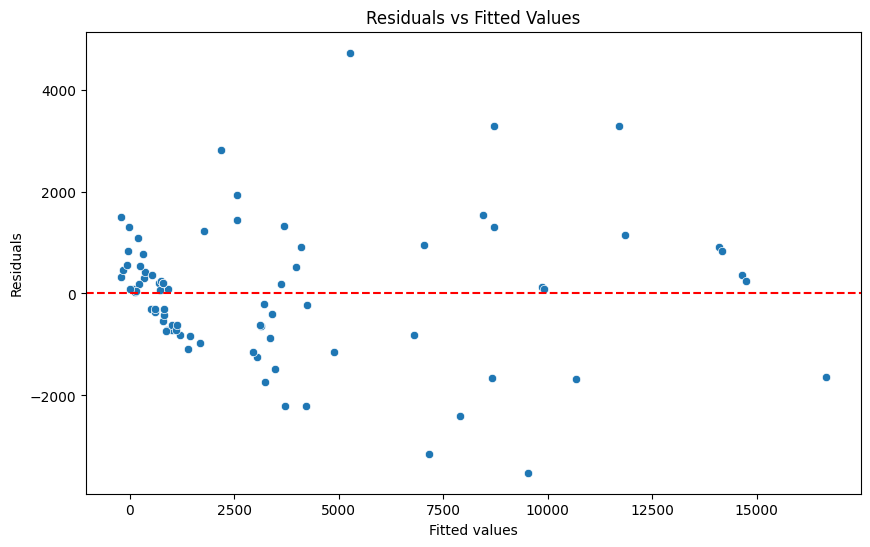

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 잔차 계산
residuals = model.resid

# 잔차 플롯
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

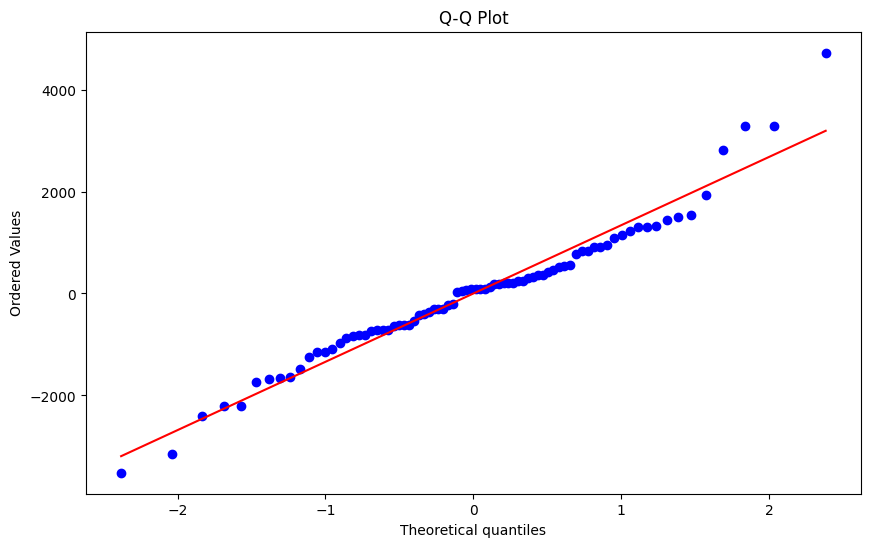

Shapiro-Wilk Test: Statistic=0.9630922079086304, p-value=0.02083929255604744


In [35]:
import scipy.stats as stats

# Q-Q 플롯
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk 검정
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

In [36]:
# 범주형 변수에서 LabelEncoder를 생성
def print_label_encoding(column_name, encoder):
    print(f"{column_name} encoding한 결과:")
    # 클래스와 인코딩된 숫자를 매핑하여 출력
    encoding_dict = dict(zip(encoder.classes_, range(len(encoder.classes_))))
    for category, code in encoding_dict.items():
        print(f"{category}: {code}")
    print()
    


spawn_rates = fish['Spawn Rates']
size = fish['Size']
lighting_type = fish['Lighting Type']
where_how = fish['Where/How']
rain_snow = fish['Rain/Snow Catch Up']
color1 = fish['Color 1']
color2 = fish['Color 2']
shadow = fish['Shadow']


label_encoder_spawn_rates = LabelEncoder().fit(spawn_rates)
label_encoder_size = LabelEncoder().fit(size)
label_encoder_lighting_type = LabelEncoder().fit(lighting_type)
label_encoder_where_how = LabelEncoder().fit(where_how)
label_encoder_rain_snow = LabelEncoder().fit(rain_snow)
label_encoder_color1 = LabelEncoder().fit(color1)
label_encoder_color2 = LabelEncoder().fit(color2)
label_encoder_shadow = LabelEncoder().fit(shadow)

In [37]:
print_label_encoding("Spawn Rates", label_encoder_spawn_rates)

Spawn Rates encoding한 결과:
1: 0
10–11: 1
11–14: 2
11–18: 3
12–16: 4
12–17: 5
14–21: 6
18–20: 7
1–2: 8
1–3: 9
1–4: 10
2: 11
20: 12
2–3: 13
2–5: 14
3–10: 15
3–4: 16
3–5: 17
3–9: 18
4: 19
4–12: 20
4–5: 21
4–6: 22
5: 23
5–10: 24
5–6: 25
5–7: 26
6: 27
6–10: 28
6–8: 29
6–9: 30
7–10: 31
7–8: 32
7–9: 33



In [38]:
print_label_encoding("Size", label_encoder_size)

Size encoding한 결과:
1x1: 0
2x1: 1
2x2: 2
3x2: 3



In [39]:
print_label_encoding("Lighting Type", label_encoder_lighting_type)

Lighting Type encoding한 결과:
Emission: 0
Fluorescent: 1
No lighting: 2



In [40]:
print_label_encoding("Where/How", label_encoder_where_how)

Where/How encoding한 결과:
Pier: 0
Pond: 1
River: 2
River (clifftop): 3
River (mouth): 4
Sea: 5
Sea (rainy days): 6



In [41]:
print_label_encoding("Rain/Snow Catch Up", label_encoder_rain_snow)

Rain/Snow Catch Up encoding한 결과:
No: 0
Yes: 1



In [42]:
print_label_encoding("Color 1", label_encoder_color1)
print_label_encoding("Color 2", label_encoder_color2)

Color 1 encoding한 결과:
Beige: 0
Black: 1
Blue: 2
Brown: 3
Gray: 4
Green: 5
Light blue: 6
Orange: 7
Red: 8
White: 9
Yellow: 10

Color 2 encoding한 결과:
Black: 0
Blue: 1
Light blue: 2
Orange: 3
Red: 4
White: 5



In [43]:
print_label_encoding("Shadow", label_encoder_shadow)

Shadow encoding한 결과:
Large: 0
Large w/Fin: 1
Long: 2
Medium: 3
Medium w/Fin: 4
Small: 5
X-Large: 6
X-Small: 7
XX-Large: 8



### 라벨 인코딩한 상태가 마음에 들지 않음

In [44]:
from sklearn.preprocessing import LabelEncoder

def frequency_based_label_encoding(df, column):
    """
    Encodes a column based on the frequency of each category.
    Categories with higher frequency get lower integers.

    Parameters:
    df (pd.DataFrame): The dataframe containing the column to encode.
    column (str): The name of the column to encode.
    
    Returns:
    None: The function updates the DataFrame in place.
    """
    # Compute the frequency of each category
    value_counts = df[column].value_counts()
    
    # Sort categories based on frequency in descending order
    sorted_categories = value_counts.index.tolist()
    
    # Create a mapping of category to frequency-based integer
    category_to_code = {category: idx for idx, category in enumerate(sorted_categories)}
    
    # Map the categories to the new encoded values
    df[column + '_Encoded'] = df[column].map(category_to_code)

categorical_columns = ['Spawn Rates', 'Size', 'Lighting Type', 'Where/How', 'Rain/Snow Catch Up', 'Color 1', 'Color 2', 'Shadow']
encoded_fish = fish.copy()

# Apply frequency-based encoding to all categorical columns
for col in categorical_columns:
    frequency_based_label_encoding(encoded_fish, col)

encoded_fish

,#,Name,Sell,Where/How,Shadow,Total Catches to Unlock,Spawn Rates,Rain/Snow Catch Up,Color 1,Color 2,Size,Lighting Type,Spawn Rates_Encoded,Size_Encoded,Lighting Type_Encoded,Where/How_Encoded,Rain/Snow Catch Up_Encoded,Color 1_Encoded,Color 2_Encoded,Shadow_Encoded
0,56,anchovy,200,Sea,Small,0,2–5,No,Blue,Red,1x1,No lighting,6,0,1,0,0,2,3,0
1,36,angelfish,3000,River,Small,20,2–5,No,Yellow,Black,1x1,Fluorescent,6,0,0,1,0,3,0,0
2,44,arapaima,10000,River,XX-Large,50,1,Yes,Black,Blue,3x2,No lighting,0,2,1,1,1,1,1,5
3,41,arowana,10000,River,Large,50,1–2,No,Yellow,Black,2x1,Fluorescent,2,1,0,1,0,3,0,3
4,58,barred knifejaw,5000,Sea,Medium,20,3–5,No,White,Black,1x1,Fluorescent,13,0,0,0,0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,23,tilapia,800,River,Medium,0,7–9,No,Black,Black,1x1,Fluorescent,12,0,0,1,0,1,0,1
76,66,tuna,7000,Pier,XX-Large,50,2,Yes,Blue,Black,2x1,Fluorescent,1,1,0,3,1,2,0,5
77,75,whale shark,13000,Sea,Large w/Fin,50,1,Yes,Black,Blue,3x2,No lighting,0,2,1,0,1,1,1,6
78,21,yellow perch,300,River,Medium,0,7–10,No,Yellow,Black,1x1,Fluorescent,8,0,0,1,0,3,0,1


In [45]:
encoded_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   #                           80 non-null     int64 
 1   Name                        80 non-null     object
 2   Sell                        80 non-null     int64 
 3   Where/How                   80 non-null     object
 4   Shadow                      80 non-null     object
 5   Total Catches to Unlock     80 non-null     int64 
 6   Spawn Rates                 80 non-null     object
 7   Rain/Snow Catch Up          80 non-null     object
 8   Color 1                     80 non-null     object
 9   Color 2                     80 non-null     object
 10  Size                        80 non-null     object
 11  Lighting Type               80 non-null     object
 12  Spawn Rates_Encoded         80 non-null     int64 
 13  Size_Encoded                80 non-null     int64 
 

In [46]:
encoded_fish.columns

Index(['#', 'Name', 'Sell', 'Where/How', 'Shadow', 'Total Catches to Unlock',
       'Spawn Rates', 'Rain/Snow Catch Up', 'Color 1', 'Color 2', 'Size',
       'Lighting Type', 'Spawn Rates_Encoded', 'Size_Encoded',
       'Lighting Type_Encoded', 'Where/How_Encoded',
       'Rain/Snow Catch Up_Encoded', 'Color 1_Encoded', 'Color 2_Encoded',
       'Shadow_Encoded'],
      dtype='object')

In [47]:
# Define the columns to drop
columns_to_drop = ['#', 'Name', 'Sell', 'Where/How', 'Shadow', 
                   'Spawn Rates', 
                   'Rain/Snow Catch Up', 'Color 1', 'Color 2', 
                   'Size','Lighting Type']

In [48]:
X = encoded_fish.drop(columns=columns_to_drop)
y = new_fish_df['Sell']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Total Catches to Unlock     80 non-null     int64
 1   Spawn Rates_Encoded         80 non-null     int64
 2   Size_Encoded                80 non-null     int64
 3   Lighting Type_Encoded       80 non-null     int64
 4   Where/How_Encoded           80 non-null     int64
 5   Rain/Snow Catch Up_Encoded  80 non-null     int64
 6   Color 1_Encoded             80 non-null     int64
 7   Color 2_Encoded             80 non-null     int64
 8   Shadow_Encoded              80 non-null     int64
dtypes: int64(9)
memory usage: 5.8 KB


In [49]:
import statsmodels.api as sm

X = encoded_fish.drop(columns=columns_to_drop)
y = new_fish_df['Sell']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     66.24
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.05e-30
Time:                        13:53:21   Log-Likelihood:                -696.14
No. Observations:                  80   AIC:                             1412.
Df Residuals:                      70   BIC:                             1436.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### 분석 결과
- 빈도 기반으로 라벨인코딩을 해 주니 결과가 바뀜
- 라벨 인코딩 방식이 회귀모델에 영향을 준 것으로 판단
- Total_Catches_to_Unlock, Rain_Snow_Encoded는 여전히 유의미함
- Rain/Snow Catch Up_Encoded의 영향이 특히 크다 
- 나머지 변수는 통계적으로 유의미하지 않음

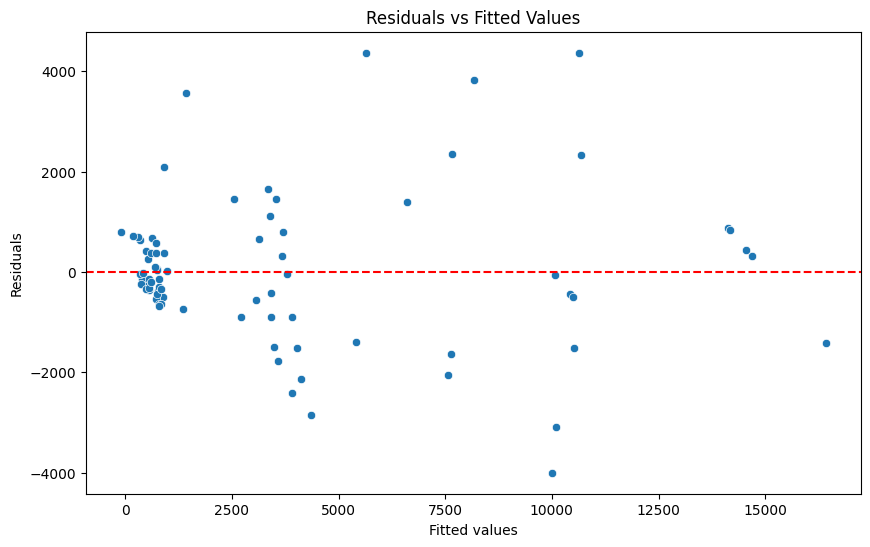

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# 잔차 계산
residuals = model.resid

# 잔차 플롯
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

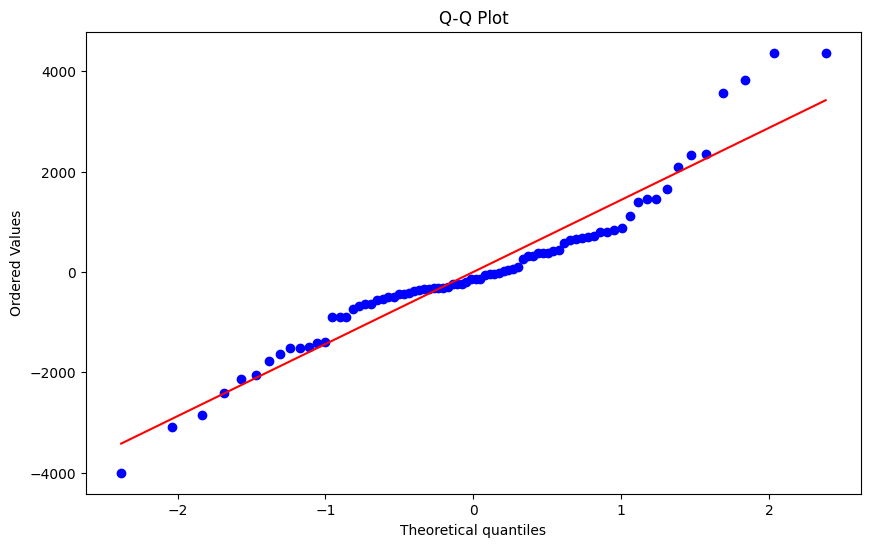

Shapiro-Wilk Test: Statistic=0.9358776211738586, p-value=0.0005831175949424505


In [51]:
import scipy.stats as stats

# Q-Q 플롯
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk 검정
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

In [52]:
new_data = pd.DataFrame({
    'Total Catches to Unlock': [100],
    'Spawn Rates': ['11–14'],
    'Size': ['2x1'],
    'Lighting Type': ['No lighting'],
    'Where/How': ['Sea'],
    'Rain/Snow Catch Up': ['Yes'],
    'Color 1': ['Gold'],
    'Color 2': ['Black'],
    'Shadow': ['Medium']
})

# Define encoding maps
encoding_maps = {
    'Spawn Rates': {'1': 0, '2': 1, '1–2': 2, '1–4': 3, '2–3': 4, '4–12': 5, '2–5': 6, '5': 7, '7–10': 8, '3–9': 9, '6–8': 10, '5–6': 11, '7–9': 12, '3–5': 13, '5–7': 14, '6–9': 15, '4': 16, '10–11': 17, '11–18': 18, '20': 19, '7–8': 20, '18–20': 21, '1–3': 22, '3–4': 23, '4–6': 24, '12–16': 25, '6–10': 26, '14–21': 27, '12–17': 28, '6': 29, '3–10': 30, '11–14': 31, '4–5': 32, '5–10': 33},
    'Size': {'1x1': 0, '2x1': 1, '3x2': 2, '2x2': 3},
    'Lighting Type': {'Fluorescent': 0, 'No lighting': 1, 'Emission': 2},
    'Where/How': {'Sea': 0, 'River': 1, 'Pond': 2, 'Pier': 3, 'River (clifftop)': 4, 'River (mouth)': 5, 'Sea (rainy days)': 6},
    'Rain/Snow Catch Up': {'No': 0, 'Yes': 1},
    'Color 1': {'Brown': 0, 'Black': 1, 'Blue': 2, 'Yellow': 3, 'Red': 4, 'Green': 5, 'Light blue': 6, 'Beige': 7, 'Orange': 8, 'Gray': 9, 'White': 10},
    'Color 2': {'Black': 0, 'Blue': 1, 'Light blue': 2, 'Red': 3, 'White': 4, 'Orange': 5},
    'Shadow': {'Small': 0, 'Medium': 1, 'X-Small': 2, 'Large': 3, 'X-Large': 4, 'XX-Large': 5, 'Large w/Fin': 6, 'Long': 7, 'Medium w/Fin': 8}
}

# Apply encoding to new_data
for col in encoding_maps:
    if col in new_data.columns:
        new_data[col + '_Encoded'] = new_data[col].map(encoding_maps[col]).fillna(-1).astype(int)

# Ensure the columns in new_data match the model's expected columns
# Select only the columns used by the model
new_data_encoded = new_data[['Total Catches to Unlock', 'Spawn Rates_Encoded', 'Size_Encoded', 'Lighting Type_Encoded', 'Where/How_Encoded', 'Rain/Snow Catch Up_Encoded', 'Color 1_Encoded', 'Color 2_Encoded', 'Shadow_Encoded']]

# Add constant column for the model
X_new_encoded = sm.add_constant(new_data_encoded, has_constant='add')

# Perform inference
predicted_sell_price = model.predict(X_new_encoded)

print("Predicted Sell Price:", predicted_sell_price[0])

Predicted Sell Price: 16986.14568925915


In [53]:
fish['Sell'].describe()

count       80.000000
mean      3745.000000
std       4517.151561
min        100.000000
25%        500.000000
50%       1500.000000
75%       5000.000000
max      15000.000000
Name: Sell, dtype: float64

# 곤충

In [54]:
df_insects = pd.read_csv("/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/insects.csv")
df_insects.head(2)

,#,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,...,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
0,10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,NaN,NaN,NaN,...,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green,Ins6,InsectMiirotateha,FtrInsectMiirotateha,620,aj95rMzdbSbvZy9A2
1,69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,...,All day,All day,All day,Black,White,Ins26,InsectAri,FtrInsectAri,588,QZpmczZu4hW2a4Rpv


In [55]:
df_insects.nunique()

#                          80
Name                       80
Sell                       35
Where/How                  25
Weather                     3
Total Catches to Unlock     4
Spawn Rates                19
NH Jan                      9
NH Feb                      9
NH Mar                      9
NH Apr                      9
NH May                      9
NH Jun                     11
NH Jul                     12
NH Aug                     12
NH Sep                     13
NH Oct                     11
NH Nov                     11
NH Dec                      9
SH Jan                     12
SH Feb                     12
SH Mar                     13
SH Apr                     11
SH May                     11
SH Jun                      9
SH Jul                      9
SH Aug                      9
SH Sep                      9
SH Oct                      9
SH Nov                      9
SH Dec                     11
Color 1                    11
Color 2                     8
Icon Filen

In [56]:
df_insects.columns

Index(['#', 'Name', 'Sell', 'Where/How', 'Weather', 'Total Catches to Unlock',
       'Spawn Rates', 'NH Jan', 'NH Feb', 'NH Mar', 'NH Apr', 'NH May',
       'NH Jun', 'NH Jul', 'NH Aug', 'NH Sep', 'NH Oct', 'NH Nov', 'NH Dec',
       'SH Jan', 'SH Feb', 'SH Mar', 'SH Apr', 'SH May', 'SH Jun', 'SH Jul',
       'SH Aug', 'SH Sep', 'SH Oct', 'SH Nov', 'SH Dec', 'Color 1', 'Color 2',
       'Icon Filename', 'Critterpedia Filename', 'Furniture Filename',
       'Internal ID', 'Unique Entry ID'],
      dtype='object')

In [57]:
insect = df_insects[['#', 'Name', 'Sell', 'Where/How', 
                     'Weather', 'Total Catches to Unlock',
                     'Spawn Rates']]
insect.head(3)

,#,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates
0,10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5
1,69,ant,80,On rotten turnips,Any weather,0,0
2,14,Atlas moth,3000,On trees (any kind),Any weather,20,5


In [58]:
insect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        80 non-null     int64 
 1   Name                     80 non-null     object
 2   Sell                     80 non-null     int64 
 3   Where/How                80 non-null     object
 4   Weather                  80 non-null     object
 5   Total Catches to Unlock  80 non-null     int64 
 6   Spawn Rates              80 non-null     object
dtypes: int64(3), object(4)
memory usage: 4.5+ KB


In [59]:
insect.nunique()

#                          80
Name                       80
Sell                       35
Where/How                  25
Weather                     3
Total Catches to Unlock     4
Spawn Rates                19
dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
label_encoder = LabelEncoder()

Where_How_encoded = label_encoder.fit_transform(insect['Where/How'])
Weather_encoded = label_encoder.fit_transform(insect['Weather'])
Spawn_Rates_encoded = label_encoder.fit_transform(fish['Spawn Rates'])

# 선택한 컬럼들로 새로운 데이터프레임 생성
selected_columns = ['Sell', 'Where/How', 'Weather', 'Spawn Rates']
new_insect_df = insect[selected_columns].copy()

new_insect_df['Total_Catches_to_Unlock'] = insect['Total Catches to Unlock']
new_insect_df['Where_How_Encoded'] = Where_How_encoded
new_insect_df['Weather_Encoded'] = Weather_encoded
new_insect_df['Spawn_Rates_Encoded'] = Spawn_Rates_encoded

In [61]:
new_insect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sell                     80 non-null     int64 
 1   Where/How                80 non-null     object
 2   Weather                  80 non-null     object
 3   Spawn Rates              80 non-null     object
 4   Total_Catches_to_Unlock  80 non-null     int64 
 5   Where_How_Encoded        80 non-null     int64 
 6   Weather_Encoded          80 non-null     int64 
 7   Spawn_Rates_Encoded      80 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 5.1+ KB


In [62]:
new_insect_df.head(2)

,Sell,Where/How,Weather,Spawn Rates,Total_Catches_to_Unlock,Where_How_Encoded,Weather_Encoded,Spawn_Rates_Encoded
0,3000,Flying near flowers,Any except rain,5,20,4,0,14
1,80,On rotten turnips,Any weather,0,0,15,1,14


In [63]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = new_insect_df[[ 'Total_Catches_to_Unlock',
                    'Where_How_Encoded', 'Weather_Encoded', 
                   'Spawn_Rates_Encoded']]
y = new_insect_df['Sell']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     44.76
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           3.70e-19
Time:                        13:53:22   Log-Likelihood:                -710.12
No. Observations:                  80   AIC:                             1430.
Df Residuals:                      75   BIC:                             1442.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

- Total_Catches_to_Unlock은 통계적으로 유의미한 변수로, Sell 가격에 가장 큰 영향
- 나머지 변수들은 유의미하지 않으므로, 가격 설정에 있어 Total_Catches_to_Unlock의 변동이 주요한 고려 사항